# ANN Intro

This NB is constructed such that it also runs in reasonable time on Laptop CPUs (e.g. an i3)

## Local Setup

There are different options to set up the TensorFlow library (which now includes [Keras](https://keras.io) as backend library) on your own computer. The simplest of them is using only the CPU and can be installed in 1 command via [`conda`](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/), in an anaconda shell run:

```
conda install tensorflow
```

**NOTE**: TF migth not be compatible with your current environment, so here we create a [new environment](https://conda.io/docs/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands) first:

```
conda create -n tf tensorflow
conda activate tf
```

In that case you need to install jupyter, scikit-learn, matplotlib, numpy and pandas in that environment again, with e.g.:

```
conda install jupyter scikit-learn matplotlib numpy pandas
```

(If you have a [supported Nvidia graphics card](https://developer.nvidia.com/cuda-gpus) in your machine and would like to use it for accelerated network training, make sure to follow [this guide](https://www.tensorflow.org/install/gpu) to install required packages and finally use the `tensorflow-gpu` library.)

The usage of the TensorFlow library in Python will be the same for CPU and GPU.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
## Scale the input data into the range [0, 1]
X= mnist.data
X= X / 255.0
y= mnist.target
## use sklearn's train_test_split to split the data into 
## 50000 instances for training (X_train, y_train), 10000 for validation (X_val, y_val) and 10000 for testing (X_test, y_test)
from sklearn.model_selection import train_test_split
test_val_size = 2/7
test_size = 1/2
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_val_size, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=test_size, random_state=42)

X.shape

(70000, 784)

In [4]:
## load an MLP classifier from sklearn with all its defaults, only specifying `random_state=42`
from sklearn.neural_network import MLPClassifier
import timeit

clf = MLPClassifier(random_state=42)

## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Size of hiden Layers: " + str(clf.hidden_layer_sizes))
##print("Number of Hidenlayers: " + str(clf.n_layers_-2) + ", Number of output neurons: " + str(clf.n_outputs_))

## train the MLP with the train set, time its execution
start = timeit.default_timer()
clf_trained = clf.fit(X_train, y_train)
stop = timeit.default_timer()
print("Runtime: {:.2f}" .format(stop-start), "seconds")
clf.predict_proba(X_test[:1])


## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Size of hiden Layers: " + str(clf.hidden_layer_sizes) + ", Number of Hidenlayers: " + str(clf.n_layers_-2) + ", Number of output neurons: " + str(clf.n_outputs_))



Size of hiden Layers: (100,)
Runtime: 65.91 seconds
Size of hiden Layers: (100,), Number of Hidenlayers: 1, Number of output neurons: 10


In [5]:

## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" % clf.score(X_train, y_train) )
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.976100


### Questions 1

1. What are the default values assumed for the MLPClassifier of sklearn?
2. What MLP is constructed with the defaults? \
   I.e. how many hidden layers and how many input, hidden and output neurons/units does the MLP have?

### Answers

1. 
    - hidden_layer_sizestuple, length = n_layers - 2, default=(100,)
    - len(clf.coefs_)
    - solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - alphafloat, default=0.0001
    - batch_sizeint, default=’auto’
    - learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    - learning_rate_initdouble, default=0.001
    - power_tdouble, default=0.5
    - max_iterint, default=200
    - shufflebool, default=True
    - random_stateint, RandomState instance, default=None
    - tolfloat, default=1e-4verbosebool, default=False
    - momentumfloat, default=0.9
    - early_stoppingbool, default=False
    - validation_fractionfloat, default=0.1
    - beta_1float, default=0.9
    - beta_2float, default=0.999
    - epsilonfloat, default=1e-8
    - n_iter_no_changeint, default=10
    - max_funint, default=15000
2. A default MLP in sklearn conisist:
   - 1 Inputlayer (size depents on input)
   - 1 Hidenlayer (size 100)
   - 1 Outputlayer (size depents on the input)
   
   

In [7]:
## Now construct another MLP classifier as above but with 2 hidden layers of 100 and 50 neurons/units.
## In addition it should used mini-batch gradient descent (mBGD) with a mini-batch size of 100
## and train only for 100 epochs.
## Read the docs carefully to figure out what you need to specify!
clf = MLPClassifier(hidden_layer_sizes=(100, 50),random_state=42, batch_size=min(100,50000),max_iter=100)

## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
## train the MLP with the train set, time its execution
clf_trained = clf.fit(X_train, y_train)
## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Number of Layers: " + str(clf_trained.n_layers_) + ", Number of Hidenlayers: " + str(clf_trained.n_layers_-2) + ", Number of output neurons: " + str(clf_trained.n_outputs_))
clf_trained.predict_proba(X_test[:1])

Number of Layers: 4, Number of Hidenlayers: 2, Number of output neurons: 10


array([[8.59856198e-14, 1.77106890e-15, 2.83380745e-13, 1.77307736e-16,
        2.59506297e-16, 3.00159860e-10, 5.28521229e-19, 8.29700347e-14,
        1.00000000e+00, 1.09165300e-16]])

In [8]:
## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" % clf.score(X_train, y_train) )
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.978200


In [7]:
def n_params(model): # from: https://stackoverflow.com/questions/59078110/way-to-count-the-number-of-parameters-in-a-scikit-learn-model
    """Return total number of parameters in a 
    Scikit-Learn model.

    This works for the following model types:
     - sklearn.neural_network.MLPClassifier
     - sklearn.neural_network.MLPRegressor
     - sklearn.linear_model.LinearRegression
     - and maybe some others
    """
    return (sum([a.size for a in model.coefs_]) +  
            sum([a.size for a in model.intercepts_]))

## use the given function to get the number of model parameters of the last MLP
n_params(clf)


84060

### Questions 2

1. Does the returned number of parameters match your expectations? Write down your own calculation!


### Answers

1. 
   - Inputlayer  784 neuronen
   - Hidenlayer1 100 neuronen
   - Hidenlayer2  50 neuronen
   - Outputlayer  10 neuronen
   
   n_params = Inputlayer * Hidenlayer1 + Hidenlayer1 * Hidenlayer2 + Hidenlayer2 * Outputlayer + Hidenlayer1 + Hidenlayer2 + Outputlayer
   
   n_params = 784 * 100 + 100 * 50 + 50 * 10 + 100 + 50 + 10 = 84060
   

In [9]:
## Now use the example from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html
## to plot ALL weight matrices of the first layer of the MLP trained above
## using subplots with 20 columns.
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    clf.fit(X_train, y_train)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))






Training set score: 1.000000
Test set score: 0.978200


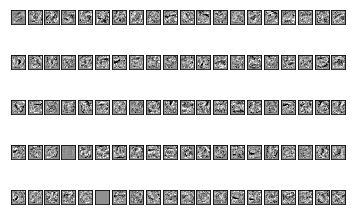

In [11]:
fig, axes = plt.subplots(5, 20)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Now it's time to test your TensorFlow installation by importing the package. The following code cell should execute without errors:

In [9]:
import tensorflow as tf

Now let's check which computing devices TensorFlow has found on this machine. If you don't have the GPU setup on your computer, the list should just contain one CPU: `/device:CPU:0` 

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17178719884721810420
xla_global_id: -1
]


2022-01-13 20:26:13.568154: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The cell below creates a similar MLP as above using tf.keras, see also this [tutorial network](https://github.com/keras-team/keras/blob/fcc0bfa354c5a47625d681d0297a66ef9ff43a9e/examples/mnist_mlp.py) which also uses the MNIST dataset.

Keras has a nice method `model.summary()` that prints a tabular overview of your network architecture, together with the input/output dimensions and number of parameters for each layer.

In [11]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 100

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_val_c = keras.utils.to_categorical(y_val, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(784,)))
model.add(Dense( 50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val_c))

2.7.0
2.7.0
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 2s 2ms/step - loss: 0.3195 - accuracy: 0.9051 - val_loss: 0.1696 - val_accuracy: 0.9492
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.1293 

500/500 [==============================] - 1s 2ms/step - loss: 5.6165e-06 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9813
Epoch 52/100
500/500 [==============================] - 1s 2ms/step - loss: 4.5253e-06 - accuracy: 1.0000 - val_loss: 0.1355 - val_accuracy: 0.9813
Epoch 53/100
500/500 [==============================] - 1s 2ms/step - loss: 3.7538e-06 - accuracy: 1.0000 - val_loss: 0.1365 - val_accuracy: 0.9814
Epoch 54/100
500/500 [==============================] - 1s 2ms/step - loss: 3.0995e-06 - accuracy: 1.0000 - val_loss: 0.1377 - val_accuracy: 0.9815
Epoch 55/100
500/500 [==============================] - 1s 2ms/step - loss: 2.5097e-06 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9814
Epoch 56/100
500/500 [==============================] - 1s 2ms/step - loss: 2.0360e-06 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9816
Epoch 57/100
500/500 [==============================] - 1s 2ms/step - loss: 1.6728e-06 - accuracy: 1.0000 - val_loss: 0.1426 

In [12]:
score = model.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.17664778232574463
Test accuracy: 0.9817000031471252


You should see the training going through the epochs and in the end the trained network is evaluated on the test set. 
It shoud reach at least a classification accurary of 97% on the test set.

### Exercise

Now try to tune the hyper-parameters of the MLP to achieve more than 98% accuracy on the test set.\
List the parameters you changed to achieve this score.

Bei den Layergrösen: 200;50 erhält man eine klasifikations genauigkeit von 98%
